In [1]:
# Create by Emanuel Valério based on Cap11 Fundamentos Python 3.0 science academy

In [ ]:
# Library's import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the datasets
df = pd.read_csv("pima-data.csv")  

In [3]:
df.shape # shows the dimensions of database

(768, 10)

In [4]:
df.head(10) # shows the first ten datas

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [5]:
df.tail(3) # shows the last three datas

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
df.isnull().values.any() # checking for null values

False

In [7]:
# Create module to check data correlation
# correlation does not imply causality
def plot_correlation(df,size=10):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

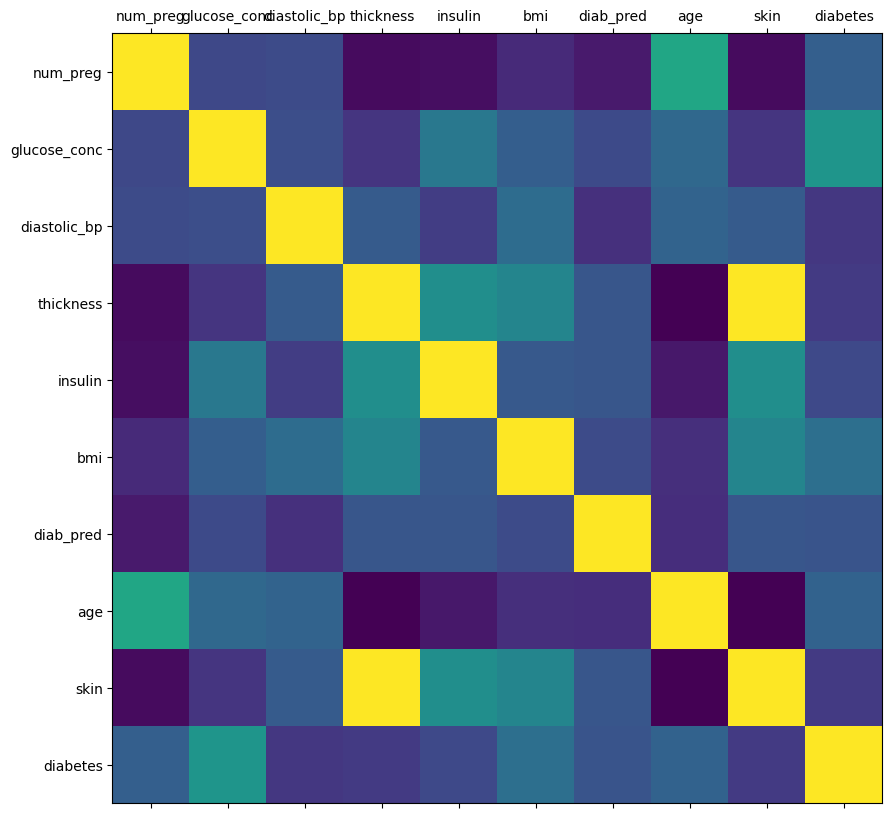

In [8]:
plot_correlation(df)

In [9]:
diabetes_map = {True : 1 , False: 0} # Changing strings values to numerics
df['diabetes'] = df['diabetes'].map(diabetes_map);

In [10]:
numTrue = len(df.loc[df['diabetes'] == 1]);
numFalse = len(df.loc[df['diabetes'] == 0]);
print("Número de casos verdadeiros: {0} ({1:2.2f}%)".format(numTrue,(numTrue /( numTrue + numFalse)) *100 ));
print("Número de casos Falsos: {0} ({1:2.2f}%)".format(numFalse,(numFalse /( numTrue + numFalse)) * 100 ));

Número de casos verdadeiros: 268 (34.90%)
Número de casos Falsos: 500 (65.10%)


In [11]:
# SPLITTING

In [12]:
from sklearn.model_selection import train_test_split # importing the scikit-learn

In [13]:
# Feature selection
features = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']

In [14]:
# target variable
atrib_prev = ['diabetes']

In [16]:
# create objects
x = df[features].values
y = df[atrib_prev].values

In [18]:
# defining the split rate
splitTestSize = 0.3;

In [21]:
# Creating training and test data
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = splitTestSize,random_state=42);


In [22]:
# Printing the results
print("{0:0.2f}% nos dados de treinos ".format(len(xTrain)/len(df.index) * 100 ));
print("{0:0.2f}% nos dados de testes ".format(len(xTest)/len(df.index) * 100 ));

69.92% nos dados de treinos 
30.08% nos dados de testes 


In [23]:
# HANDLING MISSING DATA

In [28]:
from sklearn.impute import SimpleImputer

In [31]:
filling_0 = SimpleImputer(missing_values=0,strategy = 'mean');

In [34]:
# Replacing the values equal to zero by the avarege of the data
xTrain = filling_0.fit_transform(xTrain);
xTest = filling_0.fit_transform(xTest);

In [35]:
# building and training the model
from sklearn.naive_bayes import GaussianNB


In [36]:
modelV1 = GaussianNB();

In [37]:
# Training the model
modelV1.fit(xTrain,yTrain.ravel());

In [38]:

from sklearn import metrics


In [40]:
# checking the accuracy in the training data model
nb_predict_train = modelV1.predict(xTrain);
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTrain,nb_predict_train)))
print()

Accuracy: 0.7542



In [44]:
# checking the accuracy in the test data model
nb_predict_test = modelV1.predict(xTest);
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest,nb_predict_test)))
print()

Accuracy: 0.7359



In [46]:
# creating the confusion matrix
print("Confusion Matrix ");
print("{0}".format(metrics.confusion_matrix(yTest,nb_predict_test , labels= [1,0])))
print("")

print("Classification Report ");
print("{0}".format(metrics.classification_report(yTest,nb_predict_test , labels= [1,0])))

Confusion Matrix 
[[ 52  28]
 [ 33 118]]

Classification Report 
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [47]:
# MODEL OPTIMIZATION WITH RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

In [54]:
modelV2 = RandomForestClassifier(random_state = 42);
modelV2.fit(xTrain,yTrain.ravel());

In [55]:
# checking the accuracy in the training data model
rf_predict_train = modelV2.predict(xTrain);
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTrain,rf_predict_train)))
print()

Accuracy: 1.0000



In [56]:
# checking the accuracy in the test data model
rf_predict_test = modelV2.predict(xTest);
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest,rf_predict_test)))
print()

Accuracy: 0.7403

